# Insper Jr. 

# Análise de Dados para R. Amaral Office
___


In [2]:
import pandas as pd
import os
import math
from statsmodels.tsa.seasonal import STL

%matplotlib inline
import matplotlib.pyplot as plt


## LEITURA DA BASE DE DADOS

In [3]:
## print("Esperamos trabalhar no diretório")
print(os.getcwd())


/Users/liviacarvalho/Documents/Insper Junior/Trainee /Analise de dados/Analise-de-Dados-Jr.---Livia-e-Joao/analises


In [4]:
filename = 'Base de Dados R. Amaral Office.xlsx'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Parece que o arquivo Base de Dados R. Amaral Office.xlsx está na mesma pasta do notebook da avaliação, yay!



In [5]:
# Carregando os dados
df = pd.read_excel(filename)
df.head()

,id_pedido,nome_cliente,modo_envio,estado,vendas,quantidade,desconto,lucro,segmento,região,...,dia_pedido,dia_semana_pedido,mes_pedido,ano_pedido,dia_envio,mes_envio,ano_envio,data_pedido,mes_ano,tempo_preparacao
0,1,Muhammed MacIntyre,Expresso,Paraná,825.174,9,0.30,-117.8820,Corporativo,Sul,...,4,Domingo,9,2016,6,9,2016,42617,42617,2
1,2,Ruben Dartt,Normal,São Paulo,411.332,4,0.15,-4.8392,Consumidor,Sudeste,...,5,Sexta-feira,9,2014,9,9,2014,41887,41887,4
2,3,Liz Pelletier,Mesmo Dia,São Paulo,411.332,4,0.15,-4.8392,Home Office,Sudeste,...,28,Quinta-feira,11,2013,28,11,2013,41606,41606,0
3,4,Liz Pelletier,Expresso,Amapá,241.960,2,0.00,33.8744,Consumidor,Norte,...,30,Segunda-feira,5,2016,31,5,2016,42520,42520,1
4,5,Liz Pelletier,Normal,Sergipe,341.960,2,0.00,78.6508,Home Office,Nordeste,...,31,Terça-feira,12,2013,7,1,2014,41639,41639,7


## PREPARO DA BASE DE DADOS

In [6]:
type(df)
df.dtypes

id_pedido              int64
nome_cliente          object
modo_envio            object
estado                object
vendas               float64
quantidade             int64
desconto             float64
lucro                float64
segmento              object
região                object
subcategoria          object
categoria             object
dia_pedido             int64
dia_semana_pedido     object
mes_pedido             int64
ano_pedido             int64
dia_envio              int64
mes_envio              int64
ano_envio              int64
data_pedido            int64
mes_ano                int64
tempo_preparacao       int64
dtype: object

## 5. Eficiencia Operacinal e Logística
#### 5.1 Tempo de preparação médio por modo de envio e região

In [7]:
# TEMPO DE PREPARAÇÃO MEDIO POR MODO DE ENVIO E REGIÃO Tempo de preparação (tempo_preparacao) médio por modo_envio e região
# média por modo_envio e região
pivot = df.groupby(['modo_envio', 'região'])['tempo_preparacao'] \
          .mean() \
          .reset_index()

# Reorganiza em formato de tabela cruzada (pivot table)
tabela = pivot.pivot(index='modo_envio', columns='região', values='tempo_preparacao')
print(tabela)

#média aritmética da variável tempo_preparacao para aquela combinação de modo de envio e região


região      Centro-Oeste  Nordeste     Norte   Sudeste       Sul
modo_envio                                                      
Econômico       3.169231  3.179825  3.130252  3.252619  3.423664
Expresso        2.183486  2.175953  2.272152  2.134431  2.298507
Mesmo Dia       0.090909  0.000000  0.086207  0.060837  0.000000
Normal          5.031325  4.989028  5.102564  5.021010  4.896752


In [8]:
# Agrupar por região, estado e modo_envio e calcular o tempo médio
df_estados_modo = (
    df
    .groupby(['região', 'estado', 'modo_envio'])['tempo_preparacao']
    .mean()
    .reset_index(name='tempo_medio')   
)

# Para cada região, impressao os estados e seus modos de envio ordenados
for reg in df_estados_modo['região'].unique():
    print(f"\n Região {reg}")
    sub_reg = df_estados_modo[df_estados_modo['região'] == reg]
    
    # média regional
    media_regional = sub_reg['tempo_medio'].mean()
    print(f"Média de preparação na região: {media_regional:.2f} dias\n")
    
    # ordena por estado e, dentro de cada estado, pelo modo de envio mais lento
    sub_ord = sub_reg.sort_values(['estado', 'tempo_medio'], ascending=[True, False])
    
    for est in sub_ord['estado'].unique():
        sub_est = sub_ord[sub_ord['estado'] == est]
        print(f" Estado: {est}")
        print(
            sub_est
            .rename(columns={'modo_envio': 'Modo', 'tempo_medio': 'Tempo Médio (dias)'})
            [['Modo', 'Tempo Médio (dias)']]
            .to_string(index=False)
        )
        print()



 Região Centro-Oeste
Média de preparação na região: 2.68 dias

 Estado: Distrito Federal
      Modo  Tempo Médio (dias)
    Normal            5.537037
Econômico             4.400000
  Expresso            2.000000
 Mesmo Dia            0.000000

 Estado: Goiás
      Modo  Tempo Médio (dias)
    Normal            5.075145
Econômico             3.250000
  Expresso            2.025641
 Mesmo Dia            0.066667

 Estado: Mato Grosso
      Modo  Tempo Médio (dias)
    Normal            4.797753
Econômico             3.171429
  Expresso            2.523810
 Mesmo Dia            0.000000

 Estado: Mato Grosso do Sul
      Modo  Tempo Médio (dias)
    Normal            4.888889
Econômico             2.666667
  Expresso            2.181818
 Mesmo Dia            0.333333


 Região Nordeste
Média de preparação na região: 2.59 dias

 Estado: Alagoas
      Modo  Tempo Médio (dias)
    Normal            5.136364
Econômico             3.863636
  Expresso            2.192308
 Mesmo Dia           

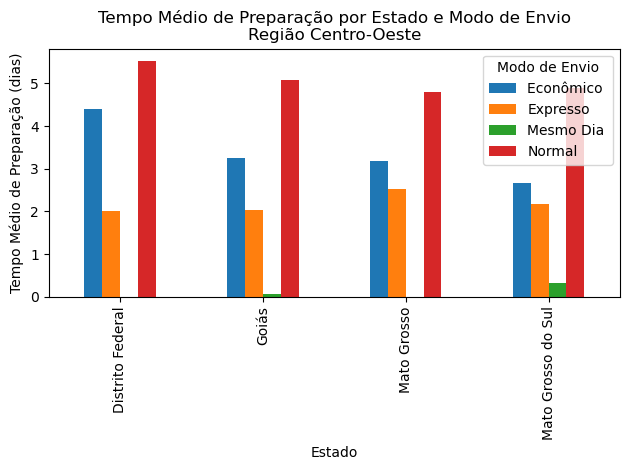

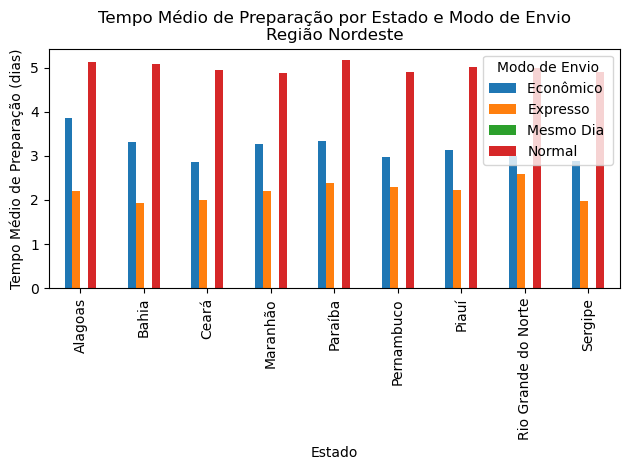

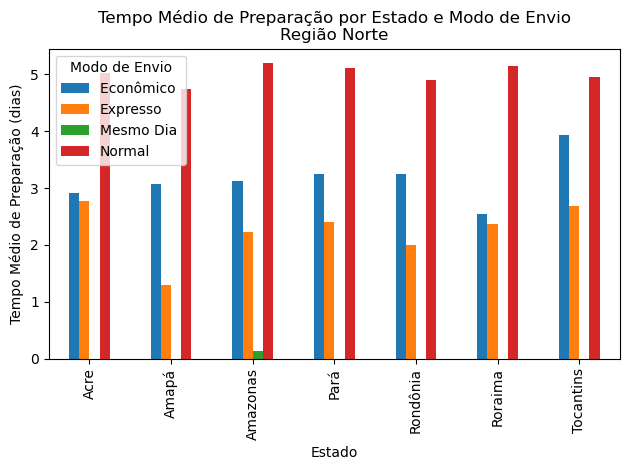

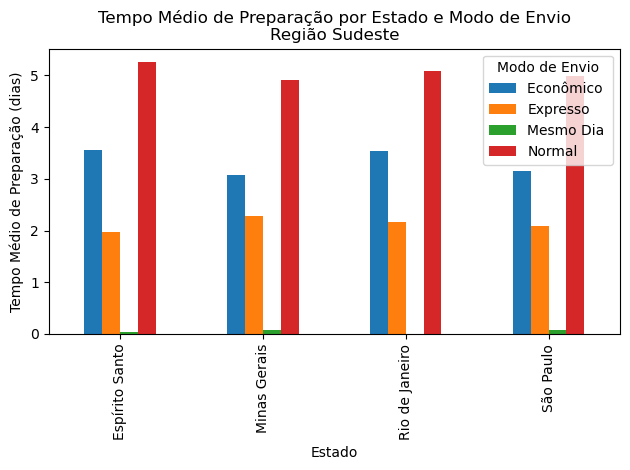

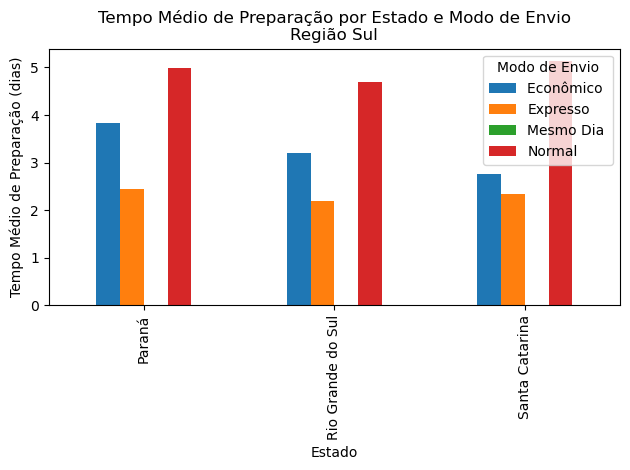

In [9]:
# Agrupa por região, estado e modo de envio
df_estados_modo = (
    df
    .groupby(['região', 'estado', 'modo_envio'])['tempo_preparacao']
    .mean()
    .reset_index(name='tempo_medio')
)

# Para cada região, gera um gráfico de barras agrupadas
regions = df_estados_modo['região'].unique()
for reg in regions:
    sub = df_estados_modo[df_estados_modo['região'] == reg]
    pivot = sub.pivot(index='estado', columns='modo_envio', values='tempo_medio')
    
    fig, ax = plt.subplots()
    pivot.plot(kind='bar', ax=ax)       # usa Matplotlib via Pandas
    ax.set_title(f'Tempo Médio de Preparação por Estado e Modo de Envio\nRegião {reg}')
    ax.set_xlabel('Estado')
    ax.set_ylabel('Tempo Médio de Preparação (dias)')
    ax.legend(title='Modo de Envio')
    plt.tight_layout()
    plt.show()


De forma panorâmica, os dados de tempo médio de preparação revelam um padrão claro em todo o país:
- Hierarquia de velocidade: Normal (4,7 a 5,3 dias - mais lento), Econômico (2,9 a 3,4 dias - intermediário) que tem mais discrepancias entre estados alguns chegam quase um dia na frente de outros, Expresso (2,0 - 2,4 dias) tem uniformidade no tempo o que indica processos e parceiros para esse serviço estão bem calibrados, e Mesmo dia teve valores muito perto de zero o que inica a eficiencia da entrega.
- Comparação Regional: As cinco macrorregiões apresentam médias globais muito próximas (2,59–2,70 d), o que sugere operação padronizada, apesar do Nordeste ser levemente mais rápido do que Norte/Centro-Oeste provavelmente refletem desafios logísticos: malha rodoviária, centralização de centros de distribuição, e níveis de estoque por região.
- Gargalos Identificados: Estados com tempo econômico elevado (ex.: Tocantins, Paraná, Rio de Janeiro) podem estar sofrendo com estoque insuficiente ou rotas pouco eficientes. E o modo Normal, embora padronizado, ainda “come” mais de cinco dias; isso pode impactar a satisfação de clientes que não optam pelo expresso mas esperam prazos moderados.
- Oportunidades de Melhoria: 
    - Reengenharia do Normal: automatizar picking, rever contratos de frete e rotas para reduzir esse lead time em, pelo menos, 10–15%.
    - Aprimorar o Econômico em pontos críticos, replicando boas práticas das regiões mais ágeis (ex.: Sudeste). - Benchmark interno: usar o Expresso, com desempenho consistente, como padrão de processo para treinar demais equipes e transportadoras.
- Implicações Estratégicas: Custo X Nível de Serviço: reequilibrar preços assegurando que “Normal” não seja subvalorizado nem crie expectativa irreais, e fazer um marketing logístico destacando nos canais de venda a velocidade do Expresso.

###### O que fariamos com mais dados? 
######  Analisariamos correlação entre tempo de preparação e taxa de cancelamento ou devolução, para quantificar o impacto operacional na receita, se tivessemos os dados de devolucao. Além disso, mapearimos as distancias dos clientes dos Centros de distribuição por estado para confirmar se a variaçào do tempo segue geografia. 

#### 5.2 Taxa de Atraso

In [14]:


# cria as colunas datetime para pedido e envio
df['data_pedido'] = pd.to_datetime(
    dict(year=df['ano_pedido'], month=df['mes_pedido'], day=df['dia_pedido'])
)
df['data_envio'] = pd.to_datetime(
    dict(year=df['ano_envio'], month=df['mes_envio'], day=df['dia_envio'])
)

# prazo real em dias
df['dias_transporte'] = (df['data_envio'] - df['data_pedido']).dt.days

# SLA (X dias) e o indicador de atraso
X = 5
df['atraso'] = df['dias_transporte'] > X

# taxa de atraso geral e por região
taxa_atraso_geral = df['atraso'].mean()
taxa_por_regiao = (
    df
    .groupby('região')['atraso']
    .mean()
    .reset_index(name='taxa_atraso')
)

print(f"Taxa de atraso geral: {taxa_atraso_geral:.2%}")
print(taxa_por_regiao)


Taxa de atraso geral: 18.25%
         região  taxa_atraso
0  Centro-Oeste     0.195051
1      Nordeste     0.169091
2         Norte     0.206747
3       Sudeste     0.182515
4           Sul     0.177361


Em média, 18,3 % dos pedidos ultrapassam o prazo de 5 dias entre a data do pedido e a data de envio — ou seja, quase 1 em cada 5 remessas está atrasada. 
